In [1]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
importlib.reload(tensorflow)

<module 'tensorflow' from '/miniconda/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [2]:
tqdm.pandas()

In [3]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [4]:
import sys

In [5]:
!{sys.executable} -m list

/miniconda/bin/python: No module named list


# Load Intermdetiate Processed Training data

In [16]:
training_df = pd.read_csv('data/intermediate/interactions_preprocessed.csv')

In [17]:
training_df

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
0,DB02704,BE0004010,2968968094 1824088295 2976033787 1228528465 29...,ATGCATTTAAATCCAGCAGAGAAAGAAAAATTACAAATTTTTCTAG...,0,[0 3 2 1 0 3 3 3 0 0 0 3 1 1 0 2 1 0 2 0 2 0 0...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 8, 2, 4, 0, ...",303,916,-613,20919,8585,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
1,DB06684,BE0001790,2968968094 2803848648 2968968094 2803848648 20...,ATGGAAATTAATGTGAGTAAATTAAGAACAGATTTGCCTCAAGTCG...,0,[0 3 2 2 0 0 0 3 3 0 0 3 2 3 2 0 2 3 0 0 0 3 3...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 8, 0, 3, 8, ...",957,644,313,20265,8857,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
2,DB03811,BE0001167,3218693969 3777168895 3217380708 3585958780 21...,ATGCCAAACTACAAACTCACTTATTTTAATATGAGGGGGAGAGCAG...,0,[0 3 2 1 1 0 0 0 1 3 0 1 0 0 0 1 3 1 0 1 3 3 0...,"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 3, 7, 7, 7, 1, ...",600,195,405,20622,9306,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
3,DB02095,BE0004952,3218693969 98513984 3218693969 98513984 321869...,ATGATCATCTTAATTTACTTATTTCTCTTGCTATGGGAAGACACTC...,0,[0 3 2 0 3 1 0 3 1 3 3 0 0 3 3 3 0 1 3 3 0 3 3...,"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",834,207,627,20388,9294,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
4,DB03698,BE0002359,2246728737 3542456614 2245384272 1173125914 22...,ATGATGATGATGATGATGATGAAAAAAATGCAGCATCAACGGCAGC...,0,[0 3 2 ... 3 0 2],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",6546,1216,5330,14676,8285,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84427,DB08280,BE0000329,2246728737 3537123720 2245277810 2442433719 22...,ATGGCTTTTATGAAAAAATATCTCCTCCCCATTCTGGGGCTCTTCA...,1,[0 3 2 2 1 3 3 3 3 0 3 2 0 0 0 0 0 0 3 0 3 1 3...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",879,544,335,20343,8957,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84428,DB04113,BE0000465,2968968094 2142032900 2968968094 2142032900 29...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...,1,[0 3 2 ... 3 2 0],"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 4, 2, 0, ...",1128,158,970,20094,9343,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84429,DB08198,BE0001852,2246728737 422715066 3217380708 4247217172 321...,ATGGCGTCGCAGCCAAATTCGTCTGCGAAGAAGAAAGAGGAGAAGG...,1,[0 3 2 ... 3 0 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",3171,460,2711,18051,9041,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84430,DB09076,BE0000560,2968968094 2119439498 2968968094 1653789098 21...,ATGAATAACTCAACAAACTCCTCTAACAATAGCCTGGCTCTTACAA...,1,[0 3 2 ... 3 0 0],"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 1, 9, 4, ...",1401,612,789,19821,8889,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."


# Preparing data

In [21]:
training_df['target_gene_code'] = training_df['target_gene_code'].apply(lambda x: ''.join(list(x.split('\n')[1:])))
#drugbank['target_amino_code'] = drugbank['target_amino'].apply(lambda x: ''.join(list(x.split('\n')[1:])))

#### Preprocessing fingerprints to feed to CNN

In [22]:
label_encoder = LabelEncoder()
label_encoder = pd.read_pickle('data/gene_encoder.pkl')
#label_encoder.fit(list(corona_gene_df['target_gene_code'].iloc[0]))

#with open('data/gene_encoder.pkl', 'wb') as f:
#    pkl.dump(label_encoder, f)
    
training_df = set(list(training_df['target_gene_code'].iloc[0]))

training_df['target_gene_encoded'] = training_df['target_gene_code'].progress_apply(\
                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
training_df['drug_fingerprint_encoded'] = training_df['drug_fingerprint_code'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

TypeError: 'set' object is not subscriptable

#### Calculate length mismatches and pad

In [19]:
corona_gene_df['target_gene_encoded_len'] = corona_gene_df['target_gene_encoded']\
                                    .apply(lambda x: len(x))
ndm_df['drug_fingerprint_encoded_len'] = ndm_df['drug_fingerprint_encoded']\
                                    .apply(lambda x: len(x))

In [20]:
max_target_gene_encoded_len = max(corona_gene_df['target_gene_encoded_len'])
max_drug_fingerprint_encoded_len = max(ndm_df['drug_fingerprint_encoded_len'])

In [21]:
corona_gene_df['target_gene_encoded_mismatch'] = max_target_gene_encoded_len - corona_gene_df['target_gene_encoded_len']

In [22]:
ndm_df['drug_fingerprint_encoded_mismatch'] = max_drug_fingerprint_encoded_len - ndm_df['drug_fingerprint_encoded_len'] 

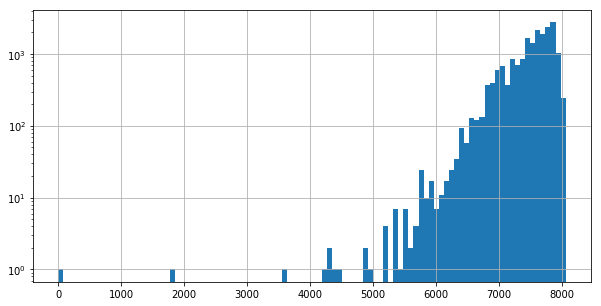

In [23]:
ndm_df['drug_fingerprint_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

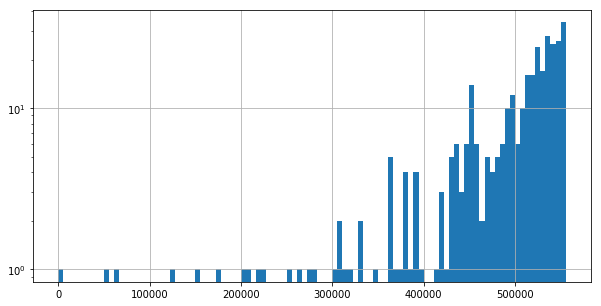

In [24]:
corona_gene_df['target_gene_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

In [25]:
max_target_gene_encoded_len

556597

In [26]:
corona_gene_df['target_gene_encoded'][0].shape

(294231,)

In [27]:
corona_gene_df['target_gene_encoded_padded'] = corona_gene_df[['target_gene_encoded','target_gene_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['target_gene_encoded_mismatch']/2))] +   
                                                        list(x['target_gene_encoded']) +
                                                        ['-1' for i in range (int(x['target_gene_encoded_mismatch']/2))]
                                                        , axis = 1)
corona_gene_df['target_gene_encoded_padded'] = corona_gene_df['target_gene_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_target_gene_encoded_len else x)

In [28]:
ndm_df['drug_fingerprint_encoded_padded'] = ndm_df[['drug_fingerprint_encoded','drug_fingerprint_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['drug_fingerprint_encoded_mismatch']/2))] +   
                                                        list(x['drug_fingerprint_encoded']) +
                                                        ['-1' for i in range (int(x['drug_fingerprint_encoded_mismatch']/2))]
                                                        , axis = 1)

ndm_df['drug_fingerprint_encoded_padded'] = ndm_df['drug_fingerprint_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_drug_fingerprint_encoded_len else x)

In [25]:
ndm_df.to_csv('data/intermediate/ndm_preprocessed.csv')
corona_gene_df.to_csv('data/intermediate/330_corona_genes_preprocessed.csv')

In [26]:
ndm_df

,cid,fingerprint,drug_fingerprint_encoded,drug_fingerprint_encoded_len,drug_fingerprint_encoded_mismatch,drug_fingerprint_encoded_padded
0,14162674.0,2246728737 3545365497 2246699815 176403689 224...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ...",479,7593,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,19462.0,2246728737 422715066 3217380708 3661262542 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",137,7935,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,73798945.0,2246728737 1858577693 2976033787 1228815484 29...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 1, 8, 5, 8, 5, ...",1203,6869,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,44260124.0,2246728737 3542456614 2245384272 1173125914 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",1026,7046,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,486612.0,2246728737 3975275337 864674487 2076190208 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 9, 7, 5, 2, ...",714,7358,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...
19598,20313888.0,2246728737 422715066 3217380708 3661262542 321...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",196,7876,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19599,131751334.0,2246728737 3542456614 2245384272 1173125914 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",730,7342,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19600,3325403.0,2246728737 3537119515 2245273601 2637439965 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",293,7779,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
19601,131753140.0,2246728737 3542456614 2245384272 1506563592 22...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",660,7412,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [27]:
corona_gene_df

,hgnc_symbol,gene_sequence,amino_acid_sequence,target_gene_code,target_gene_encoded,target_gene_encoded_len,target_gene_encoded_mismatch,target_gene_encoded_padded
0,AP3B1,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,TAHAQGVDCQVGSGSRDESGSACARSSVRELVLFRALWTGTFWREP...,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,"[0, 1, 3, 2, 1, 2, 1, 0, 3, 2, 1, 2, 1, 0, 2, ...",294231,262366,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,BRD4,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,DVSALAAAAAAAAAAGLFVLVSRSRGAEAVAAAAAAAAAGGARGRA...,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,"[2, 0, 1, 2, 3, 1, 0, 2, 3, 2, 1, 2, 1, 3, 2, ...",97027,459570,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,BRD2,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,GQIVFRVLQ*GK*Q*ELL*GRGGGR*GRGGRRE*KLRLRGRKGSSL...,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,"[2, 2, 1, 1, 0, 0, 0, 3, 1, 2, 3, 1, 3, 3, 1, ...",3660,552937,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,CWC27,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,SGARVR*QHGGVREGLLWAGVVFGVPVLRDIDKLKLSCTTGLKEEC...,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,"[0, 2, 1, 2, 2, 3, 2, 1, 3, 1, 2, 2, 2, 3, 1, ...",249821,306776,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,ZC3H18,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,RTTVAA**RRTMAGPRG*WSPFVPPVSSLEPEPVKSGRAKGRLLHA...,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,"[0, 2, 2, 0, 1, 3, 0, 1, 1, 2, 3, 1, 2, 1, 2, ...",61586,495011,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...
325,BCS1L,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,KEDAEPSRLRTFTCGRAG*GRRQVGTREEIRLSSGQEG*GRERTD*...,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,"[0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 3, 2, 0, 2, ...",4680,551917,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
326,NDUFAF1,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,GREKQMDLYG*SGFWAEGTL*ARGGKRRQAGGWCVPGVGRRQSPGT...,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,"[2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, ...",15167,541430,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
327,TMED5,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,VRGRGGRRSRLA*GGRD*GGCGIGLLAPPRVPTLWRTALLFRRECS...,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,"[2, 3, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, ...",30775,525822,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
328,NDUFB9,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,ALPAGPAQSPAAGVQFPGSPRGRGRSAP*WRSWRRDPT*PISKRCC...,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,"[2, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 3, 2, 2, 1, ...",41548,515049,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


## Prediction

In [18]:
X_0 = np.array(training_df['target_gene_encoded_padded'].tolist())
X_1 = np.array(training_df['drug_fingerprint_encoded_padded'].tolist())

In [19]:
X_0.shape,X_1.shape

((84432,), (84432,))

In [31]:
X_0_subset_smaller = X_0[:50,:30000]
X_1_subset = X_1[:5000,:]

In [20]:
X_0 = np.vectorize(lambda x: int(x))(X_0)
#X_0_subset_smaller = np.vectorize(lambda x: int(x))(X_0_subset_smaller)
X_1 = np.vectorize(lambda x: int(x))(X_1)
#X_1_subset = np.vectorize(lambda x: int(x))(X_1_subset)

ValueError: invalid literal for int() with base 10: "['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', 

In [33]:
def generate_pairs(X_0, X_1, target_length):
    X = np.ones((X_0.shape[0] * X_1.shape[0], X_0.shape[1] + X_1.shape[1]))
    for i in tqdm(range(X_0.shape[0])):
        for j in range(X_1.shape[0]):
            X[int((X_1.shape[0]*i)+j),:] = np.hstack((X_0[i,:], X_1[j,:])) + 1
    return X

In [34]:
target_length = 30723

In [35]:
X = generate_pairs(X_0_subset_smaller, X_1_subset, target_length = target_length)

In [36]:
#Middle out trimming
#target_length = 30723
X = X[:, (int(X.shape[1]/2) - int(target_length/2)):(int(X.shape[1]/2) + int(target_length/2)) + 1]

In [37]:
#Side trimmming
#target_length = 30723
#X = X[:, :target_length]

In [38]:
X.shape

(250000, 30723)

In [39]:
from tensorflow import keras

use_model = keras.models.load_model('models/CNN_GPU_VGG_rebalance.model')

In [40]:
# use_model = keras.models.load_model('models/CNN_GPU_VGG_87p.model')

In [49]:
Y = use_model.predict(X[..., np.newaxis])

ResourceExhaustedError: OOM when allocating tensor with shape[32,1,5121,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv1d_7_1/conv1d/Conv2D-0-0-TransposeNCHWToNHWC-LayoutOptimizer}} = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1d_7_1/conv1d/Conv2D, PermConstNCHWToNHWC-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node activation_1_1/Sigmoid/_1435}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_292_activation_1_1/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [66]:
for X_sub in tqdm(np.array_split(X,10000)): 
    
    #print(X_sub.shape)
    Y = np.vstack((Y, use_model.predict(X_sub[..., np.newaxis])))

Text(0,0.5,'Number of Pairs')

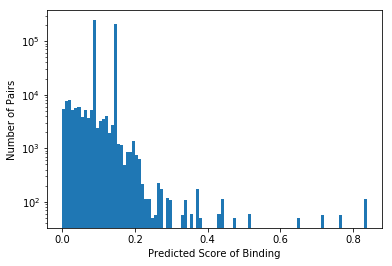

In [67]:
plt.hist(Y, bins = 100, log = True)
plt.xlabel('Predicted Score of Binding')
plt.ylabel('Number of Pairs')

In [73]:
len(np.where(Y > 0.8)[0])

115

In [72]:
np.where(Y > 0.8)

(array([251725, 254187, 256725, 259187, 261725, 264187, 266725, 269187,
        271725, 274187, 276725, 279187, 281725, 284225, 286687, 289975,
        292437, 294975, 297437, 299975, 302437, 304975, 307437, 309975,
        312437, 314975, 317437, 319975, 322437, 324975, 327437, 329975,
        332437, 334975, 337437, 339975, 342437, 344975, 347437, 349975,
        352437, 354975, 357437, 359975, 362437, 364975, 367437, 369975,
        372437, 374975, 377437, 379975, 382437, 384975, 387437, 389975,
        392437, 394975, 397437, 399975, 402437, 404975, 407437, 409975,
        412437, 414975, 417437, 419975, 422437, 424975, 427437, 429975,
        432437, 434975, 437437, 439975, 442437, 444975, 447437, 449975,
        452437, 454975, 457437, 459975, 462437, 464975, 467437, 469975,
        472437, 474975, 477437, 479975, 482437, 484975, 487437, 489975,
        492437, 494975, 497437, 499975, 502437, 504975, 507437, 509975,
        512437, 514975, 517437, 519975, 522437, 524975, 527437, 